In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Set seed for reproducability
np.random.seed(42)

<--------Data Generation------->

In [3]:
n_samples = 200

In [5]:
#Feature 1 TV add spends
tv_spend = np.random.normal(5000,1000,n_samples)

In [6]:
# Feature 2: Social Media Spend 
# Intentionally highly correlated with TV Spend (0.9 correlation roughly)
# Logic: Marketing team scales them together.
social_spend = (tv_spend * 0.8) + np.random.normal(0, 500, n_samples)

In [7]:
# Feature 3: Radio Spend (Independent)
radio_spend = np.random.normal(2000, 500, n_samples)

In [10]:
# Target: Yearly Sales
# The true relationship: Sales = 2*TV + 3*Social + 1.5*Radio + Noise
# Note: TV and Social are the strong drivers.
sales = 2*tv_spend + 3*social_spend + 1.5*radio_spend + np.random.normal(0,2000,n_samples)

In [11]:
# Creating Data frame
df = pd.DataFrame(
    {
        'TV_Spend': tv_spend,
        'Social_Spend': social_spend,
        'Radio_Spend':radio_spend,
        'Sales': sales
    }
)

In [12]:
df.head()

,TV_Spend,Social_Spend,Radio_Spend,Sales
0,5357.787360,3489.016059,2378.494308,27549.075233
1,5560.784526,4148.940110,1538.917338,27726.032754
2,6083.051243,4869.062844,2434.802960,30544.756199
3,6053.802052,4866.531939,2677.818929,29430.054758
4,3622.330632,2672.831770,2206.717452,19969.679378


In [13]:
# We are using two methods to identify multicolinearity in the given dataset.
# VIF and Visualize Heatmap.
###HeatMAp#########

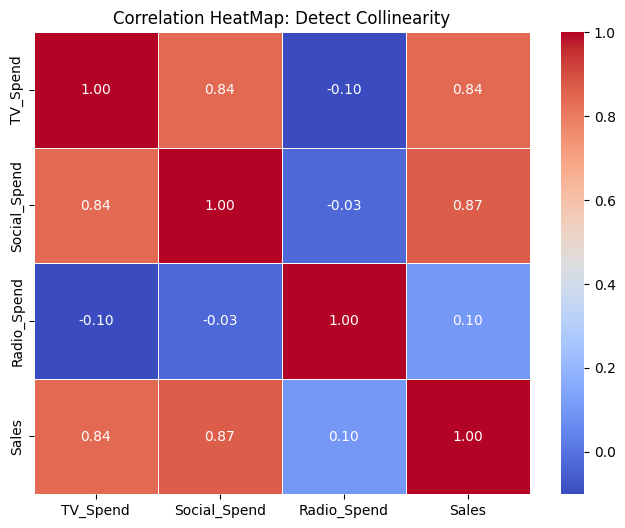

In [14]:
plt.figure(figsize=(8,6))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title("Correlation HeatMap: Detect Collinearity")
plt.show()